<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Laplacian eigenmaps
- Exercises

<hr/>

<h1><font color="darkblue">Spectral Methods</font></h1>


- Spectral embedding

> Construct the (latent) coordinates based on a given "similarity" graph or matrix
> 

- Spectral clustering

> Use these new coordinates as input to the usual methods <br>
> E.g., simple thresholding, K-means clustering

## Adjacency Matrix

- Are two objects "close"? Are the vertices connected?

> Encode it in an $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

## Graph Laplacian

- Degree matrix $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$


## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 
><br><br>
> where $D$ has diagonal elements
><br><br>
>$\displaystyle d_{ii} = \sum_j w_{ij}$

- Interesting property

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 $ 

## Minimization

- Solution: smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution (constant) <br>
> We use the 2nd eigenvector, and so on...

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Blobs 

- Calculate and show the adjacency matrix
- Solve for the first 3 non-trivial eigenvectors
- Plot the diffusion coordinates
- Plot the original coordinates colored by the eigenvectors


In [6]:
X = loadtxt('Class-Blobs.csv', delimiter=',')
X.shape

(1000, 2)

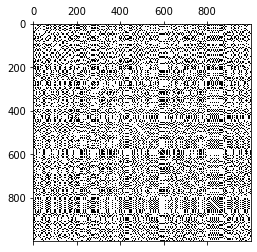

In [7]:
d =  X[newaxis,:,:] - X[:,newaxis,:] # calc difference between points
d2 = (d*d).sum(axis=2) # calc distances between points
A = (d2<16).astype(np.float32) # distance threshold = 16.
np.fill_diagonal(A,0); spy(A);

[-1.0886496e-15  7.0050931e+00  3.0633287e+01]
(1000,) (1000, 1000)


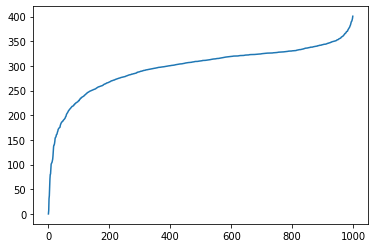

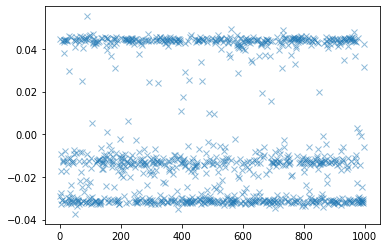

In [8]:
dd = A.sum(axis=0)
D = diag(dd)

L = D - A

# get eigenvalues of L
w, v = np.linalg.eigh(L)

print (w[:3])
print (w.shape, v.shape)
plot(w)

figure()
plot(v[:,1], 'x', alpha=0.5);

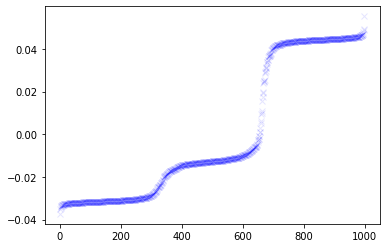

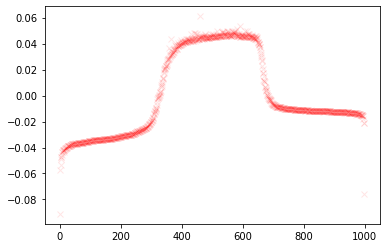

In [9]:
s = argsort(v[:,1]); 
figure(); plot(v[s,1],'bx',alpha=0.1);
figure(); plot(v[s,2],'rx',alpha=0.1);

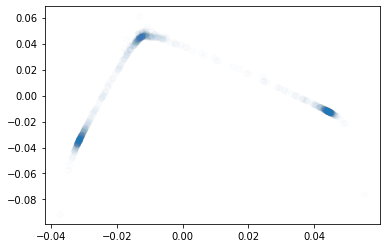

In [10]:
scatter(v[:,1],v[:,2], alpha=0.01);

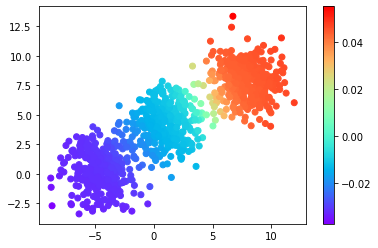

In [11]:
#first component labels (2nd eigenvector)
scatter(X[:,0], X[:,1], c=v[:,1], cmap=cm.rainbow); colorbar();

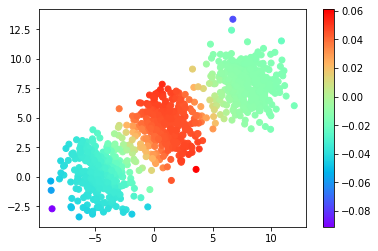

In [12]:
#second component labels (3rd eigenvector)
scatter(X[:,0], X[:,1], c=v[:,2], cmap=cm.rainbow); colorbar();

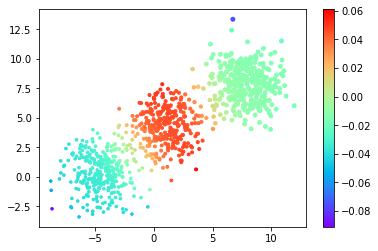

In [13]:

scatter(X[:,0], X[:,1], c=v[:,2], s=100*(0.1+v[:,1]), cmap=cm.rainbow); colorbar();

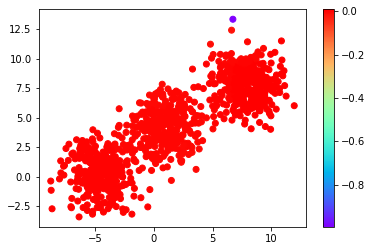

In [14]:
# 4th eigenvector
scatter(X[:,0], X[:,1], c=v[:,3], cmap=cm.rainbow); colorbar();

# Circles

Using weights

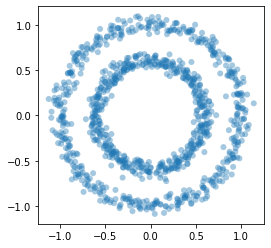

In [15]:
from sklearn import datasets
np.random.seed(3) # try other seeds, e.g., 0

X, c = datasets.make_circles(n_samples=1000, factor=0.6, noise=0.05)

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], alpha=0.4, edgecolor='none');

[5.05778048e-15 5.95166131e-02 7.74030224e-02 8.32023793e-02]


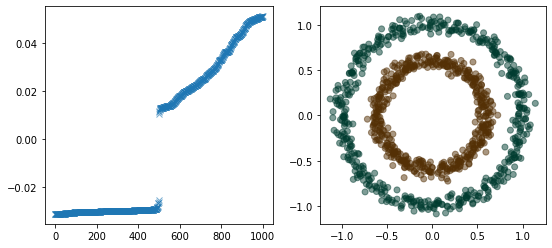

In [16]:
# Weight matrix 
d =  X[newaxis,:,:] - X[:,newaxis,:] #difference between points 
d2 = (d*d).sum(axis=2) # distance between points

W = exp(-d2 / 0.016) #wieght based on distance
np.fill_diagonal(W,0) #fill diagonal of W with zeros.

# Laplacian
dd = W.sum(axis=0)
D = diag(dd)
L = D - W

# eigenproblem
w, v = linalg.eigh(L)
labels = v[:,1] > 0
print (w[:4])

# plots
figure(figsize=(9,4)); subplot(121);

s = argsort(v[:,1]); plot(v[s,1], 'x', alpha=0.6);
subplot(122,aspect='equal')
scatter(X[:,0], X[:,1], c=labels, cmap=cm.BrBG, alpha=0.5);

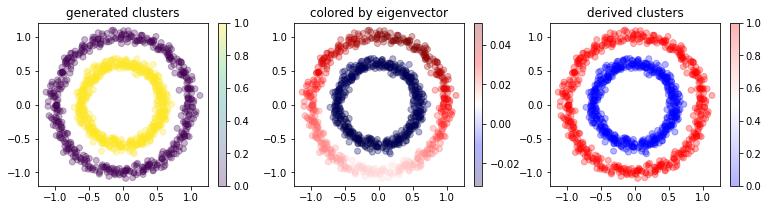

In [17]:
figure(figsize=(13,3)); 

subplot(131,aspect='equal'); scatter(X[:,0],X[:,1],c=c,alpha=0.3); 
colorbar(); title('generated clusters');

subplot(132,aspect='equal'); scatter(X[:,0],X[:,1],c=v[:,1],cmap=cm.seismic,alpha=0.3); 
colorbar(); title('colored by eigenvector'); # no strict threshold

subplot(133,aspect='equal'); scatter(X[:,0],X[:,1],c=(v[:,1]>0),cmap=cm.bwr, alpha=0.3); 
colorbar(); title('derived clusters'); # threshold to determine label of two clusters.

## Embedding coordinates

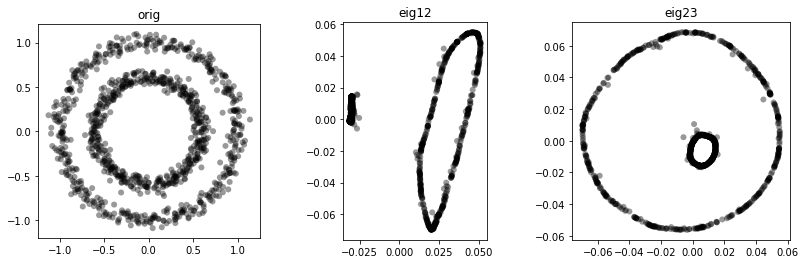

In [18]:
figure(figsize=(13.5,4)); 

subplot(131,aspect='equal');
scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); title('orig');

subplot(132,aspect='equal');
scatter(v[:,1],v[:,2],c='k',edgecolor='none',alpha=0.4); title('eig12');

subplot(133,aspect='equal');
scatter(v[:,2],v[:,3],c='k',edgecolor='none',alpha=0.4); title('eig23');

## Embedding with scikit-learn

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.spectral_embedding.html)



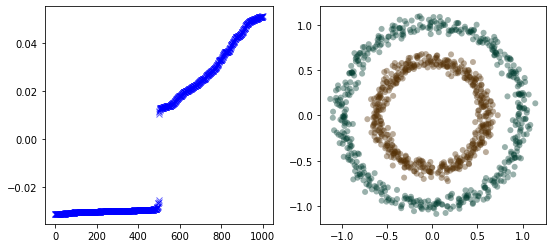

In [19]:
from sklearn.manifold import spectral_embedding

e = spectral_embedding(adjacency=W, n_components=4, norm_laplacian=False,
                       drop_first=False)
s = argsort(e[:,1]) 

figure(figsize=(9,4)) 
subplot(121); plot(e[s,1], 'xb', alpha=0.6)
subplot(122, aspect='equal')
scatter(X[:,0],X[:,1],c=(e[:,1]>0),cmap=cm.BrBG,edgecolor='none',alpha=0.4);

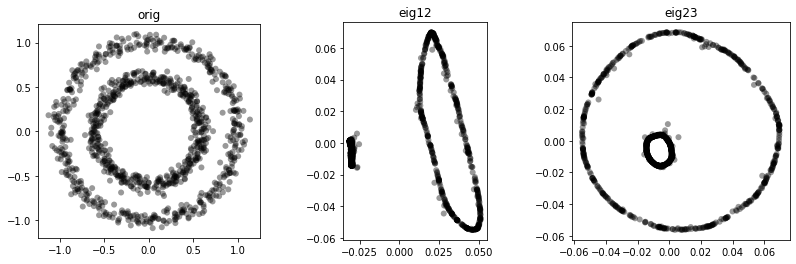

In [20]:
figure(figsize=(13.5,4)); 

subplot(131,aspect='equal');
scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); title('orig');

subplot(132,aspect='equal');
scatter(e[:,1],e[:,2],c='k',edgecolor='none',alpha=0.4); title('eig12');

subplot(133,aspect='equal');
scatter(e[:,2],e[:,3],c='k',edgecolor='none',alpha=0.4); title('eig23');

## Alternatively

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html)


In [21]:
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components=3, n_neighbors=20)

f = se.fit_transform(X)

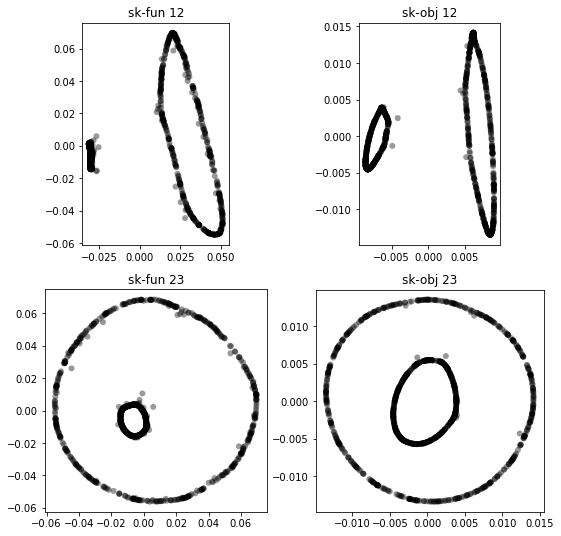

In [22]:
figure(figsize=(9,9)); 

subplot(221,aspect='equal');
scatter(e[:,1],e[:,2],c='k',edgecolor='none',alpha=0.4); title('sk-fun 12');

subplot(223,aspect='equal');
scatter(e[:,2],e[:,3],c='k',edgecolor='none',alpha=0.4); title('sk-fun 23');

subplot(222,aspect='equal');
scatter(f[:,0],f[:,1],c='k',edgecolor='none',alpha=0.4); title('sk-obj 12');

subplot(224,aspect='equal');
scatter(f[:,1],f[:,2],c='k',edgecolor='none',alpha=0.4); title('sk-obj 23');

## Parameters

- Often we use a combination of two parameters

> $k$: number of neighbors to consider for similarity graph
><br>
> $\epsilon$: bandwidth of the $\exp\left(-d^2/\epsilon\right)$ similarity

## Clustering with scikit-learn

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)

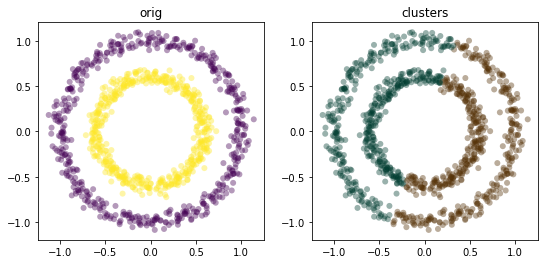

In [23]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2)
clusters = sc.fit_predict(X)

figure(figsize=(9,4)); 

subplot(121,aspect='equal')
scatter(X[:,0],X[:,1],c=c,edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(X[:,0],X[:,1],c=clusters,cmap=cm.BrBG,edgecolor='none',alpha=0.4); title('clusters');

## Exercise

- What's wrong with the above clustering?
- Read the documentation and fix the code
- If you found a fix, look for another